# Use deep learning for image classification

This Python notebook shows you how to use [deep learning](https://en.wikipedia.org/wiki/Deep_learning) to build a classification model that maps images of single digit numbers to their corresponding numeric representations.

This notebook is adapted from the deep learning tutorial that describes the important deep learning concepts and includes code snippets at https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

This notebook is compatible with, and will experience a significant performance boost using GPUs. If you have a GPU available on your cluster, open this notebook using the jupyter image titled Python 3.5 with GPU. Also ensure that in your environment settings, you have enabled use of the GPU in this project.


## Table of contents

1. [Load libraries](#load_libraries)
1. [Access data](#access_data)
1. [Train the pattern recognition model](#train_model)
1. [Summary](#summary)


<div style="text-align:center" markdown="1">
![Image of Image to Digit](https://www.wolfram.com/mathematica/new-in-10/enhanced-image-processing/HTMLImages.en/handwritten-digits-classification/smallthumb_10.gif)
Mapping images of numbers to numbers
</div>

<a id="load_libraries"></a>
## Load libraries

If you haven't already installed it, run the following cell to install the `nolearn` deep learning Python library in your notebook environment. Then, import the the libraries that you will be using for this notebook.

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, confusion_matrix
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


Using TensorFlow backend.


<a id="access_data"></a>
## Access data

MNIST is a database of handwritten numbers. Because it uses real-world data, it is an ideal database for training neural networks and machine learning tools that use pattern recognition.

Run the following cell to get the MNIST data set of images of handwritten numbers:

In [2]:
mnist_data = mnist.load_data()

Then split the images into training and testing data sets:

In [3]:
(trX, trY), (teX, teY) = mnist_data
print("Number of images for training: {}".format(trX.shape[0]))
print("Number of images used for testing: {}".format(trY.shape[0]))
pix = teX.shape[1]
print("Each image is: {} by {} pixels".format(pix,pix))

Number of images for training: 60000
Number of images used for testing: 60000
Each image is: 28 by 28 pixels


### Visualization
Let's pull some random elements from the `trX` array and print out visual representations.

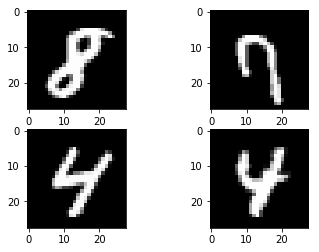

In [4]:
plt.subplot(221)
plt.imshow(trX[np.random.randint(60000)], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(trX[np.random.randint(60000)], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(trX[np.random.randint(60000)], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(trX[np.random.randint(60000)], cmap=plt.get_cmap('gray'))
plt.show()

<a id="train_model"></a>
## Train the pattern recognition model

We need to represent each image as an array of pixels. Then we can use these arrays as training data.

In [5]:
num_pixels = trX.shape[1] * trX.shape[2]
X_train = trX.reshape(trX.shape[0], num_pixels).astype('float32')
X_test = teX.reshape(teX.shape[0], num_pixels).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

Keras requires the single output column to be split into multiple columns for each output class.

In [6]:
y_train = np_utils.to_categorical(trY)
y_test = np_utils.to_categorical(teY)
num_classes = y_test.shape[1]

We can now train a `keras.Sequential` model:

In [7]:
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
scores = model.evaluate(X_test, y_test, verbose=0)
print(scores)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s - loss: 0.2787 - acc: 0.9210 - val_loss: 0.1389 - val_acc: 0.9589

Then evaluate the the quality of the predictions for each digit:

In [8]:
preds = model.predict(X_test)
print(classification_report(teY, np.argmax(preds, axis=1)))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.97      0.98      1032
          3       0.98      0.98      0.98      1010
          4       0.99      0.98      0.98       982
          5       0.98      0.98      0.98       892
          6       0.99      0.98      0.98       958
          7       0.98      0.98      0.98      1028
          8       0.96      0.98      0.97       974
          9       0.98      0.97      0.97      1009

avg / total       0.98      0.98      0.98     10000



Define a function that randomly selects a few of the test images and their predictions:

Actual digit is 4, model predicted 4


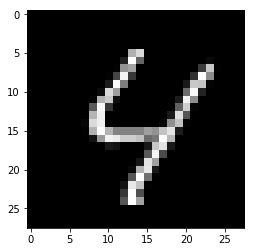

In [9]:
def randIm():
    i = np.random.choice(np.arange(0, len(teY)), size = (1,))
    pred = model.predict(np.atleast_2d(X_test[i]))
    image = (X_test[i] * 255).reshape((28, 28)).astype("uint8")
    # show the prediction
    print("Actual digit is {}, model predicted {}".format(teY[i][0],np.argmax(pred[0])))
    imgplot = plt.imshow(image)
    imgplot.set_cmap('gray')   

randIm() 

Run this function several times to see randomly picked examples from the test data set:

Actual digit is 6, model predicted 6


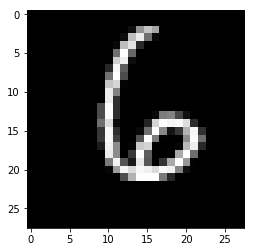

In [10]:
randIm()

Actual digit is 7, model predicted 7


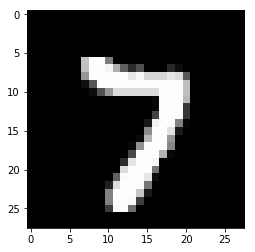

In [11]:
randIm()

<a id="summary"></a>
## Summary

In this Python notebook, you learned how to access the MNIST database that contains sample handwritten numbers. You learned to train a `keras.Sequential` model to recognize handwritten single digit numbers and evaluate the predicted numeric output.

## Authors

**Jorge Castañón** is a senior data scientist at IBM Analytics, specializing in machine learning and text analytics using Apache Spark and Hadoop.

**Akhil Tandon** is a data scientist at IBM Analytics, specializing in machine learning using Python and R.

Some of the code used in this notebook was contributed by **Jason Brownlee**, of http://www.machinelearningmastery.com

<div class="alert alert-block alert-info"> Note: To save resources and get the best performance please use the code below to stop the kernel before exiting your notebook.</div>

In [ ]:
%%javascript
Jupyter.notebook.session.delete();

<hr>
Copyright &copy; IBM Corp. 2017. Released as licensed Sample Materials.